<a href="https://colab.research.google.com/github/riyagarasangi/Brain-Tumor-Detection-System/blob/main/Lab_Assignment_2_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Training Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Testing Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Found 1639 images belonging to 4 classes.
Found 1168 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 1633s 32s/step - accuracy: 0.7369 - loss: 0.6377 - val_accuracy: 0.3690 - val_loss: 4.6404
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 1252s 24s/step - accuracy: 0.8620 - loss: 0.2967 - val_accuracy: 0.4170 - val_loss: 4.5154
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 1277s 24s/step - accuracy: 0.8996 - loss: 0.2083 - val_accuracy: 0.4392 - val_loss: 4.7910
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 1248s 24s/step - accuracy: 0.9143 - loss: 0.1954 - val_accuracy: 0.4341 - val_loss: 4.2435
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 1250s 24s/step - accuracy: 0.9446 - loss: 0.1265 - val_accuracy: 0.4486 - val_loss: 4.1031
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 1292s 25s/step - accuracy: 0.9545 - loss: 0.1174 - val_accuracy: 0.4735 - val_loss: 5.8654
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 1297s 25s/step - accuracy: 0.9600 - loss: 0.1158 - val_accuracy: 0.4426 - val_loss: 5.2879
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 1259s 24s/step - accuracy: 0.9519 - loss: 0.0944 - val_accu

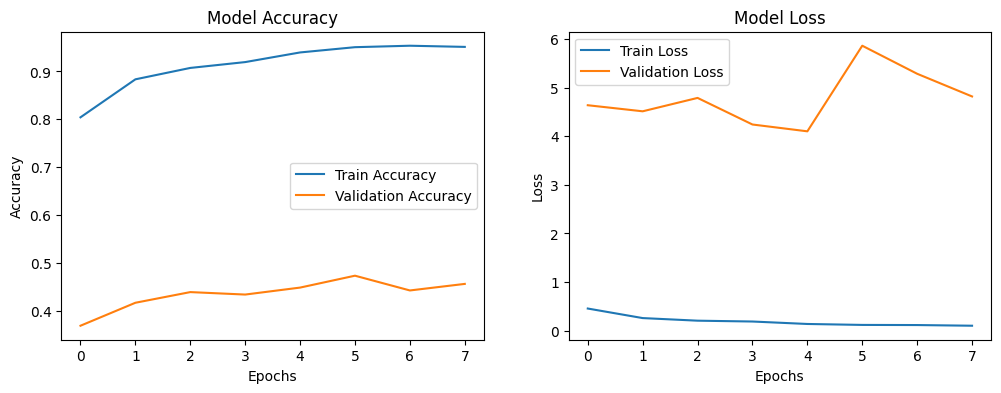

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


dataset_path = "/content/drive/MyDrive/brain mri images"


if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}")


train_dir = os.path.join(dataset_path, "Training")
test_dir = os.path.join(dataset_path, "Testing")


print("Training Classes:", os.listdir(train_dir))
print("Testing Classes:", os.listdir(test_dir))


IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-4]:
    layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)


model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

EPOCHS = 25

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)]
)


test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()
